**House Price Prediction using Linear Regression**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from scipy.stats import norm , skew

from sklearn.datasets import fetch_california_housing
fetch_california_housing = fetch_california_housing()
x = fetch_california_housing.data
y = fetch_california_housing.target

In [3]:
data = pd.DataFrame(x, columns = fetch_california_housing.feature_names)
data["SalePrice"] = y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
fetch_california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [5]:
data.shape

(20640, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Data Visualisation and Normalisation**

C:\Users\soodv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


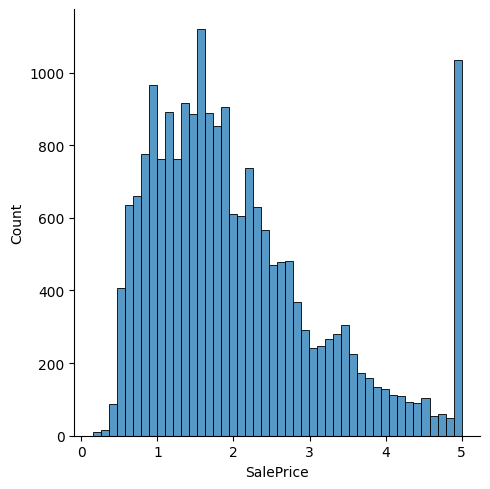

In [9]:
sns.displot(data["SalePrice"])
plt.show()

C:\Users\soodv\AppData\Local\Temp\ipykernel_7012\3139223627.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SalePrice"])


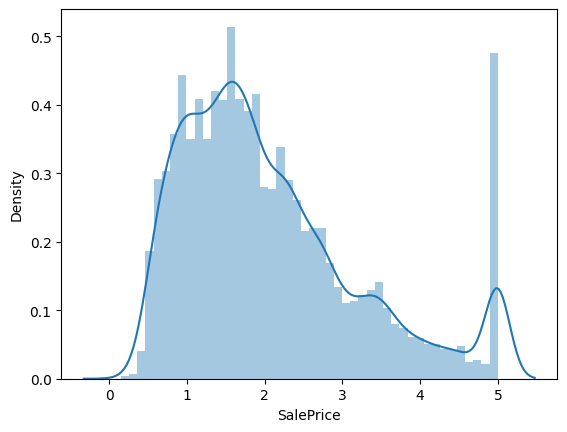

In [10]:
sns.distplot(data["SalePrice"])
plt.show()

In [11]:
skw = data["SalePrice"].skew()
kurt = data["SalePrice"].kurtosis()
print(f"Skewness = {skw}")
print(f"Kurtosis = {kurt}")

Skewness = 0.9777632739098345
Kurtosis = 0.3278702429465876


(array([11885.,  6984.,  1771.,     0.,     0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

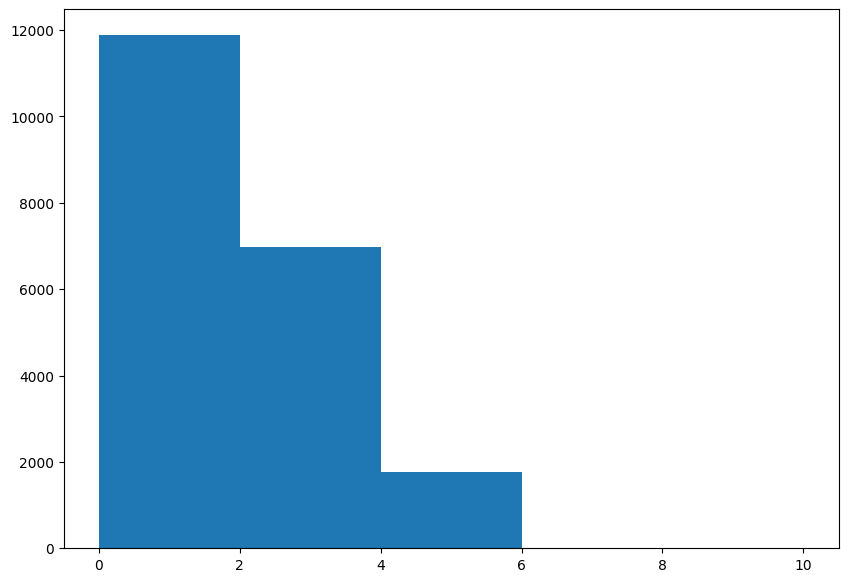

In [12]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data["SalePrice"], bins = [0, 2, 4, 6, 8, 10])

C:\Users\soodv\AppData\Local\Temp\ipykernel_7012\688209691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SalePrice"] , fit = norm)


mu = 2.068558169089147 and sigma = 1.1539282040412253


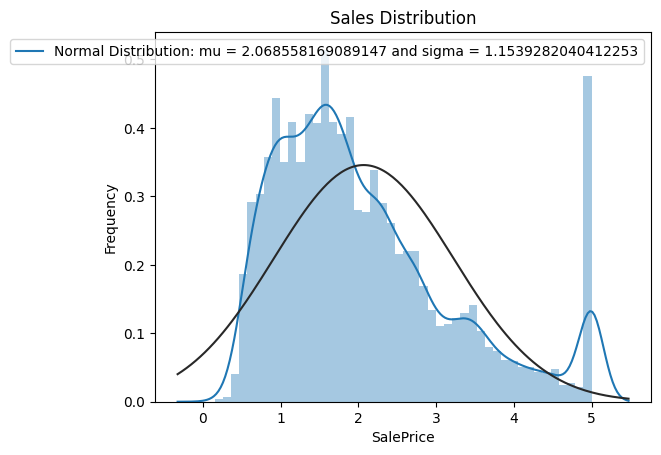

In [13]:
sns.distplot(data["SalePrice"] , fit = norm)

mu , sigma = norm.fit(data["SalePrice"])
print(f"mu = {mu} and sigma = {sigma}")

plt.legend([f"Normal Distribution: mu = {mu} and sigma = {sigma}"], loc = "best")
plt.ylabel("Frequency")
plt.title("Sales Distribution")
plt.show()

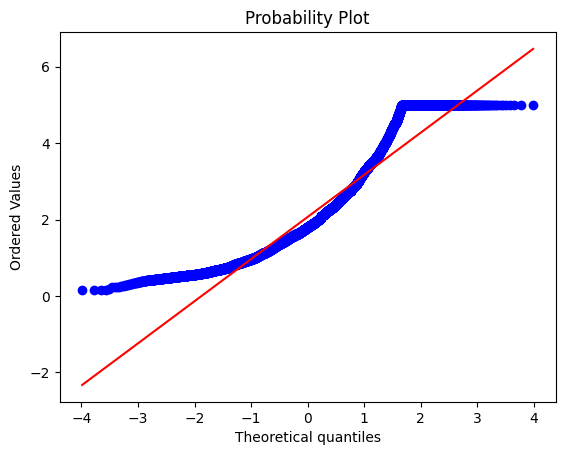

In [14]:
fig = plt.figure()
res = stats.probplot(data["SalePrice"],plot = plt)
plt.show()

C:\Users\soodv\AppData\Local\Temp\ipykernel_7012\3867288884.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SalePrice"] , fit = norm)


mu = 1.0561463885819422 and sigma = 0.35620311476955885


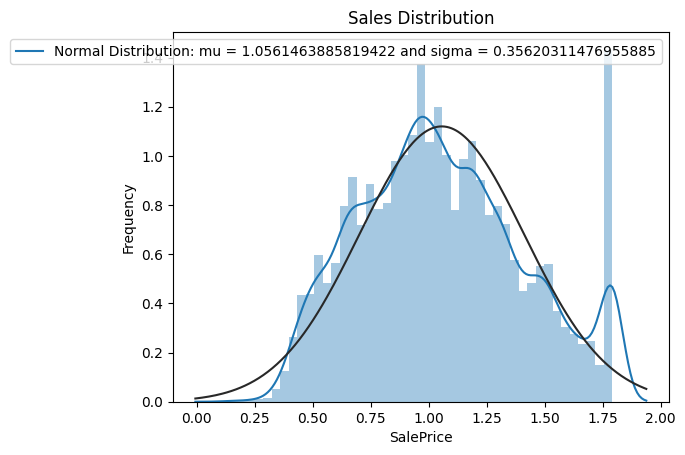

In [15]:
data["SalePrice"] = np.log1p(data["SalePrice"])

# plotting again
sns.distplot(data["SalePrice"] , fit = norm)

mu , sigma = norm.fit(data["SalePrice"])
print(f"mu = {mu} and sigma = {sigma}")

plt.legend([f"Normal Distribution: mu = {mu} and sigma = {sigma}"], loc = "best")
plt.ylabel("Frequency")
plt.title("Sales Distribution")
plt.show()

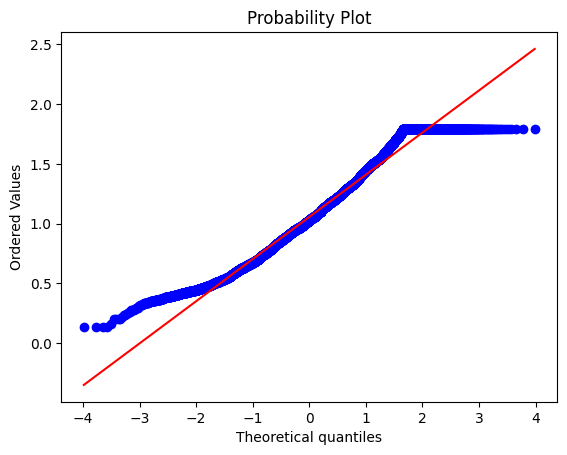

In [16]:
fig = plt.figure()
res = stats.probplot(data["SalePrice"],plot = plt)
plt.show()

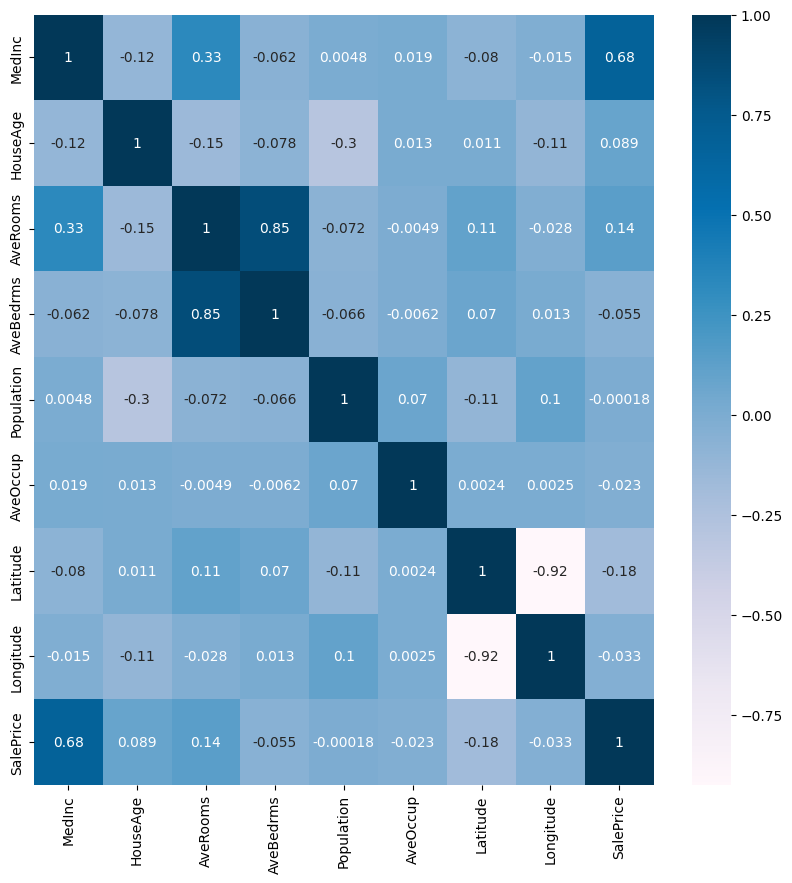

In [17]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr , annot= True , cmap = plt.cm.PuBu)
plt.show()

In [27]:
new=data.drop('Latitude', axis = 1)
data_main = new.drop('Longitude',axis = 1)
data_main.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,1.709464
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,1.522790
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,1.508733
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,1.484555
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,1.486592


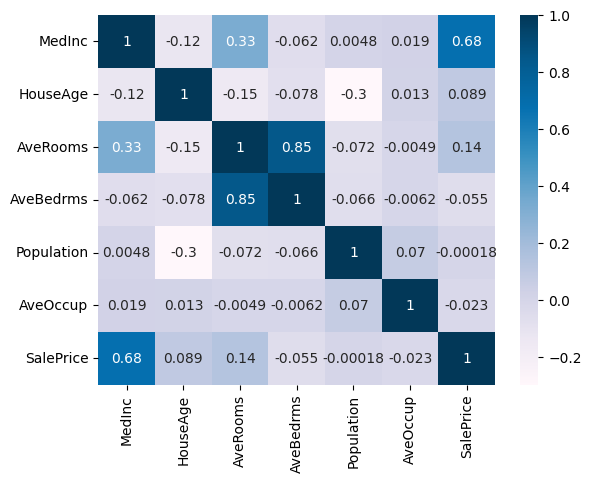

In [28]:
corr = data_main.corr()
sns.heatmap(corr , annot= True , cmap = plt.cm.PuBu)
plt.show()

In [42]:
cor_target = abs(corr["SalePrice"]) #absolute value
relevant_features = cor_target[cor_target > 0.06] #highly correlated
names = [] # getting names of features
for index in relevant_features:
    names.append(index)
print(len(names))

4


In [43]:
for i in names:
    print(i)

0.6764390622427641
0.08858793802599117
0.13903632976807245
1.0


**Model Building**

In [44]:
from sklearn.model_selection import train_test_split
x = data_main.drop("SalePrice", axis= 1)
y = data_main["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state=42)
x_train.shape

(16512, 6)

In [45]:
x_test.shape

(4128, 6)

In [46]:
y_train.shape

(16512,)

In [47]:
y_test.shape

(4128,)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [49]:
predictions = lr.predict(x_test)

In [52]:
print(f"Actual Value of house = {y_test[0]}")
print(f"Model Predicted value = {predictions[0]}")

Actual Value of house = 1.7094642265012248
Model Predicted value = 0.7348592601322571


In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , predictions)
rmse = np.sqrt(mse)
print(f"Accuracy: {100 - rmse*100}%")

Accuracy: 74.8264639523064%
